In [ ]:
#importing the required libraries.
import numpy as np           
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.mixture import  GaussianMixture
from sklearn.linear_model import LinearRegression

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import  RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import NearMiss

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense

In [ ]:
#extracting the data from csv
df=pd.read_csv('/content/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#checking for datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe() #finding measures of central tendency

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.shape

(284807, 31)

In [ ]:

classes=df['Class'].value_counts()

In [ ]:

non_fraud=round(classes[0]/df['Class'].count()*100,2)
fraud=round(classes[1]/df['Class'].count()*100, 2)
print("Non-Fraudulent : {} %".format(non_fraud))
print("    Fraudulent : {} %".format(fraud))

Non-Fraudulent : 99.83 %
    Fraudulent : 0.17 %


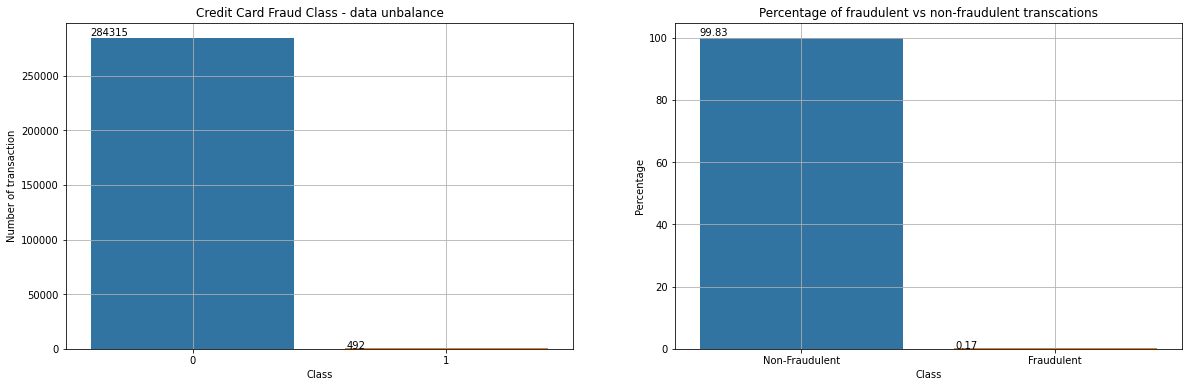

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
ax=sns.countplot(df["Class"])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")
plt.grid()
plt.subplot(1,2,2)
#made a dictionary with class as one atrrribute and percentage as another attribute
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[non_fraud, fraud]} 
#conversion of dictionary attributes into a dataframe
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
ax=sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.grid()

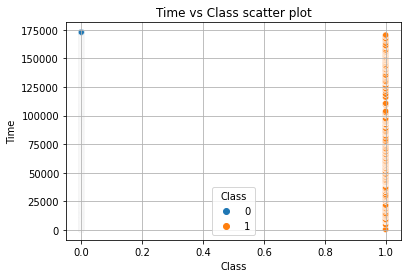

In [ ]:

# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(x= df["Class"],y=df["Time"],hue=df["Class"])
plt.title("Time vs Class scatter plot")
plt.grid()

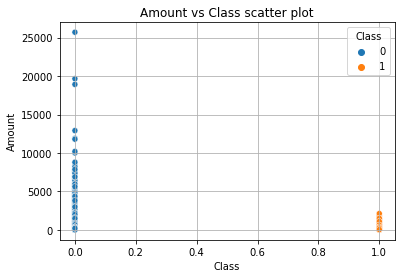

In [ ]:

# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x=df["Class"],y=df["Amount"],hue=df["Class"])
plt.title("Amount vs Class scatter plot")
plt.grid()



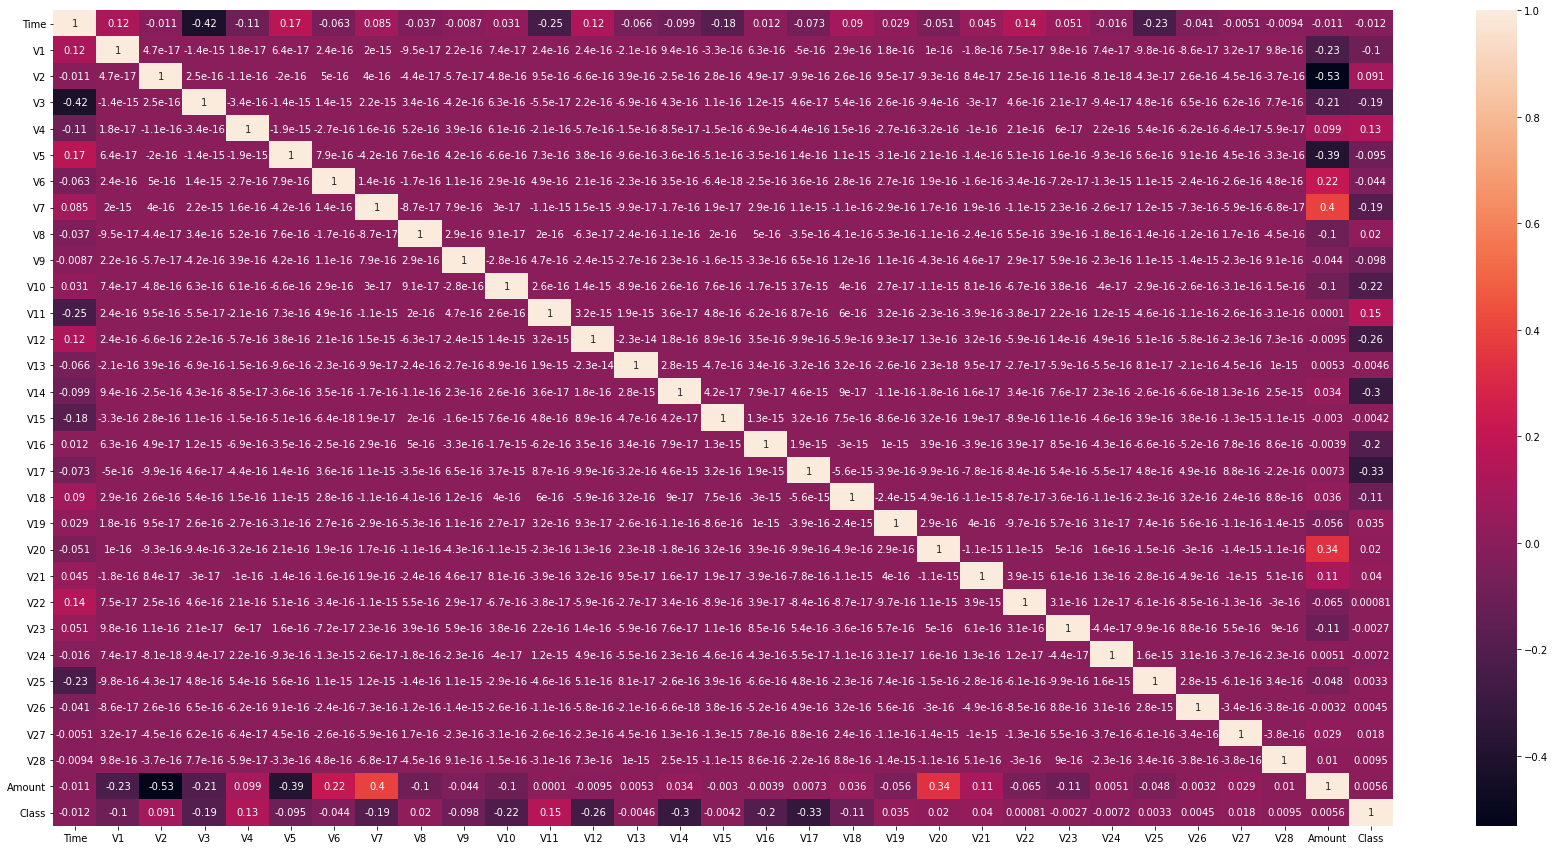

In [ ]:
%matplotlib inline
plt.figure(figsize = (30,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

<Figure size 432x288 with 0 Axes>

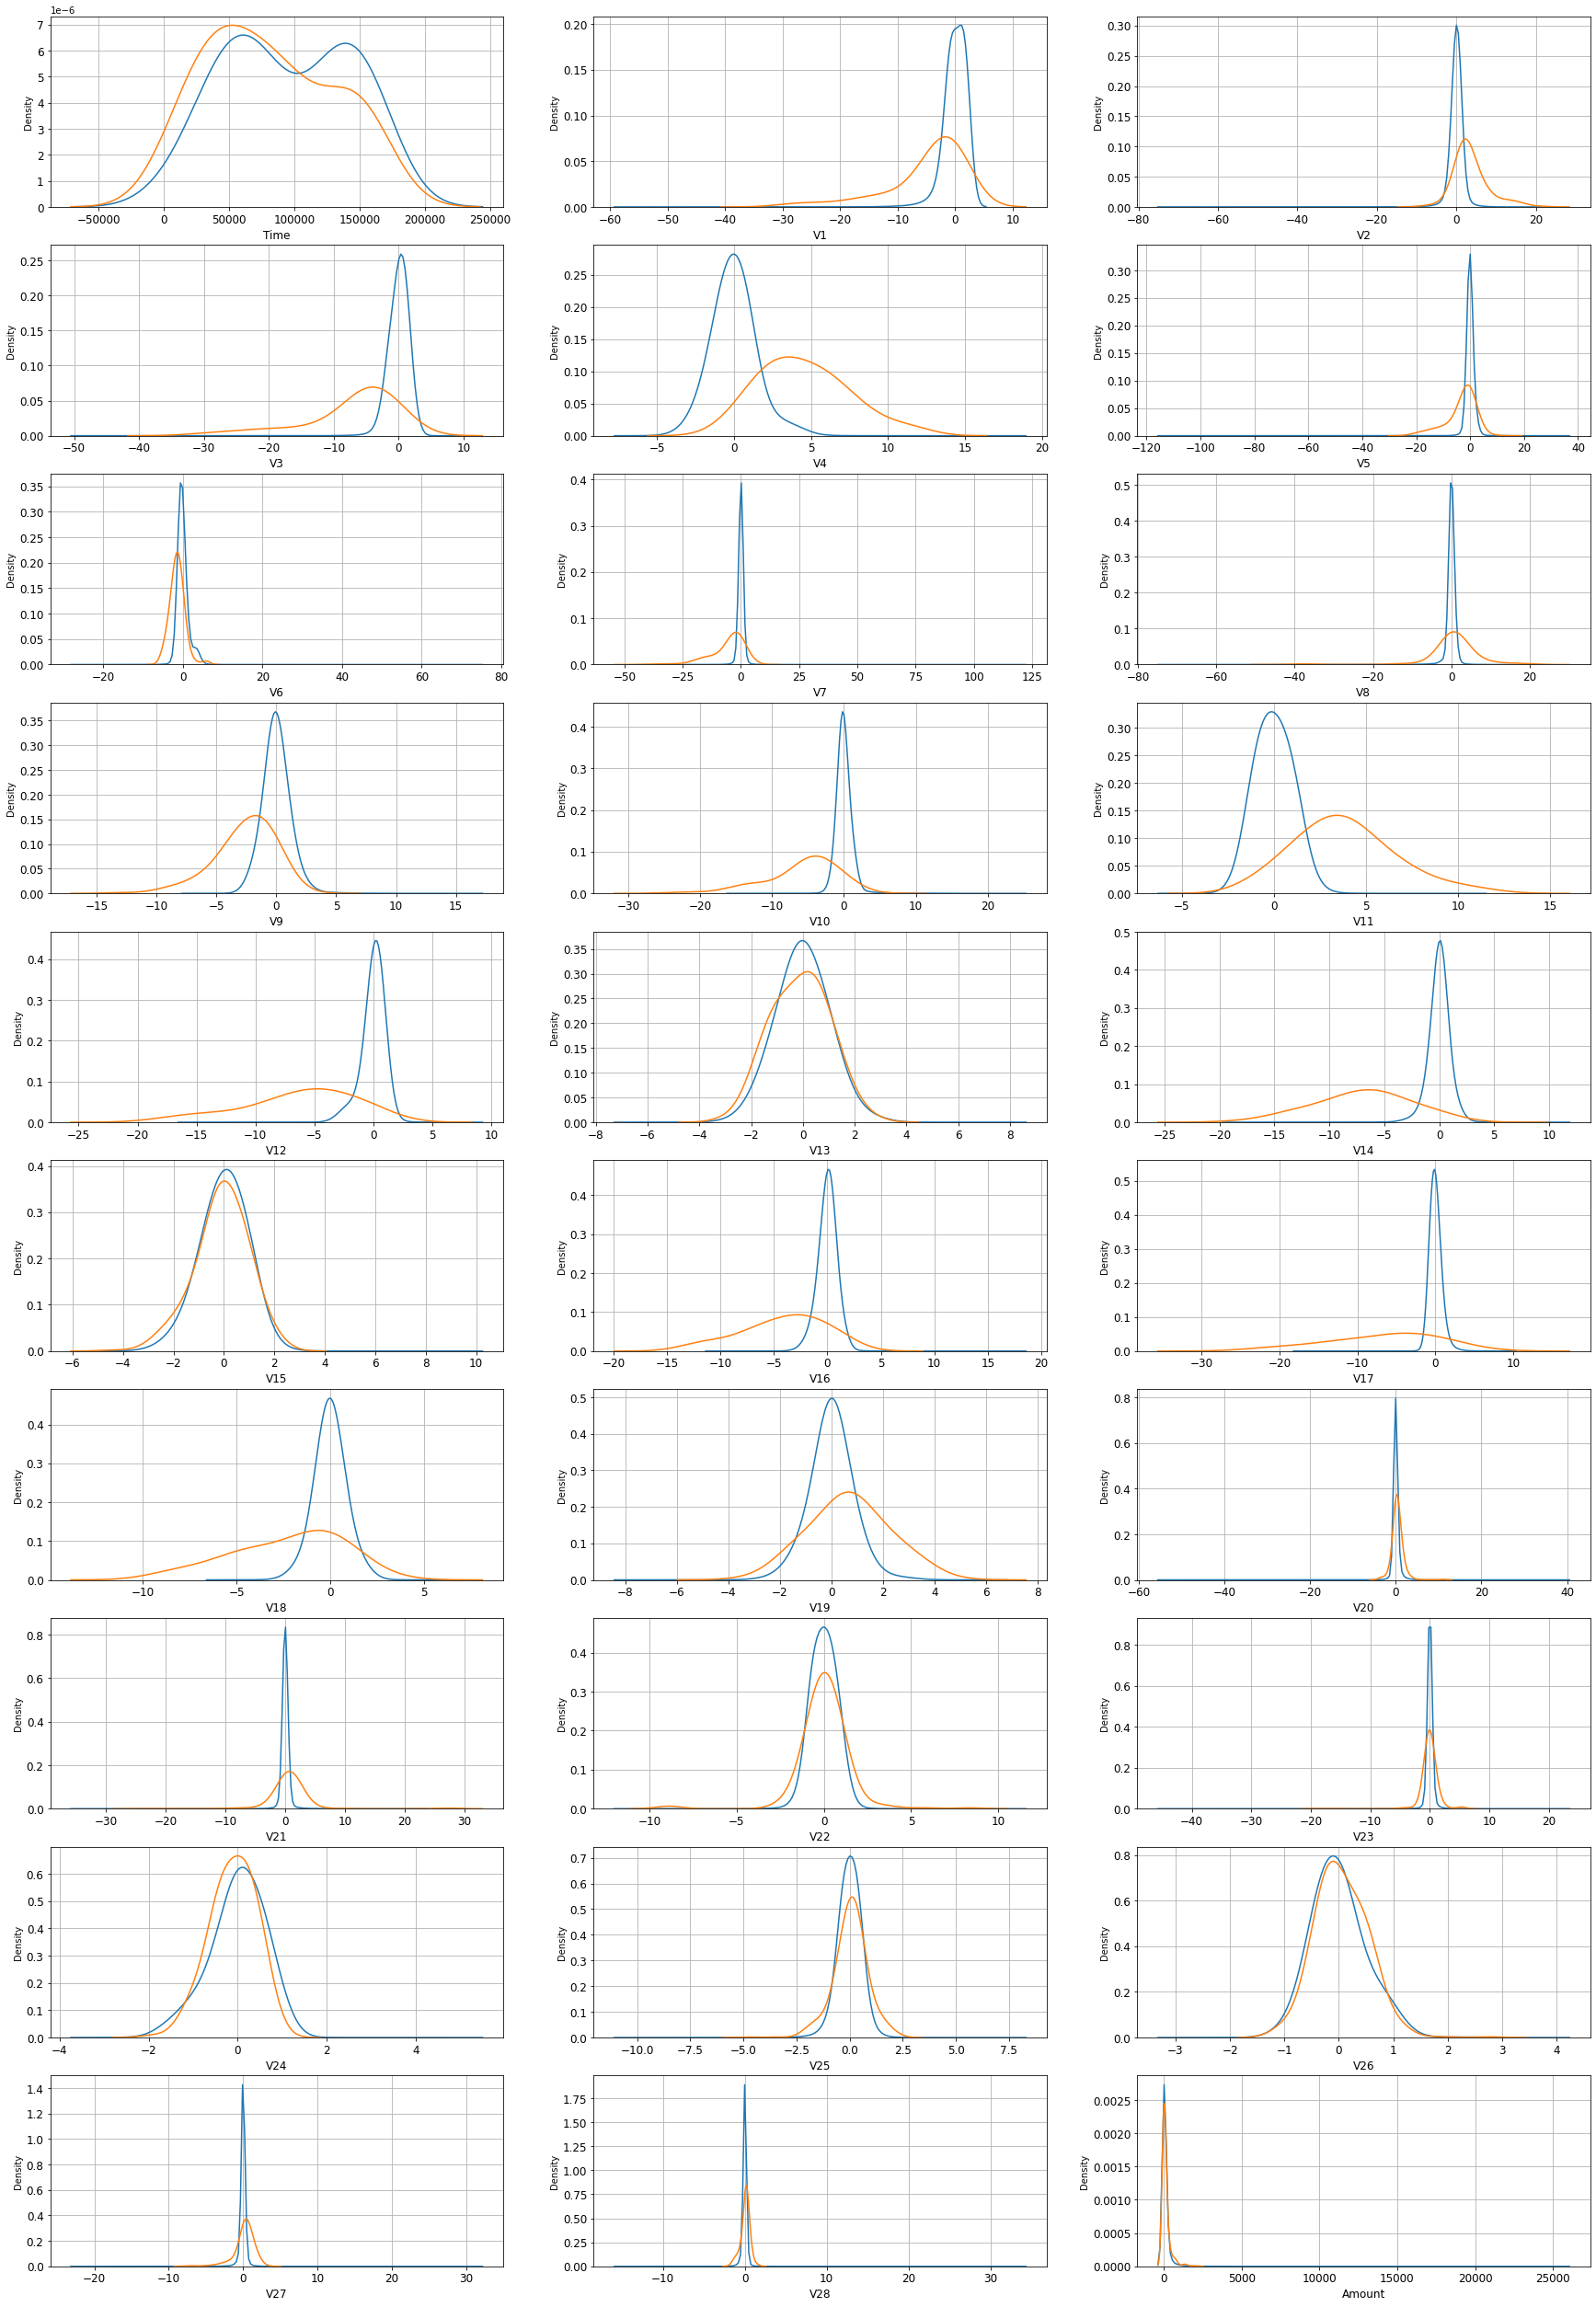

In [ ]:
# Plotting all the variable in displot to visualise the distribution
var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
#segregating fraud and non fraud
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(10,3,figsize=(30,45));

for feature in var:
    i += 1
    plt.subplot(10,3,i)
    sns.kdeplot(x=t0[feature], bw_method=0.5,label="0")
    sns.kdeplot(x=t1[feature], bw_method=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.grid()
plt.show()

In [ ]:
#df=df.drop("Time",axis=1)

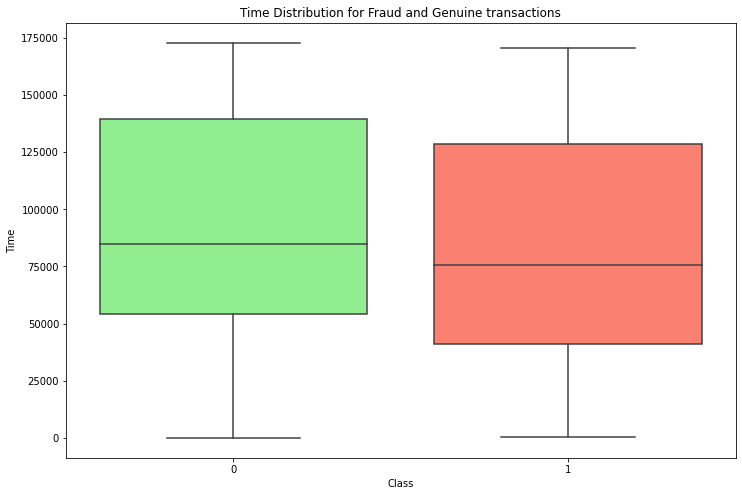

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='Class', y='Time',data = df)

# Change the appearance of that box
ax.artists[0].set_facecolor('#90EE90')
ax.artists[1].set_facecolor('#FA8072')

plt.title('Time Distribution for Fraud and Genuine transactions')
plt.show()



In [ ]:
# Scaling the train data
scaler = RobustScaler()
scaled_time = scaler.fit_transform(df["Time"].values.reshape(-1,1))
scaled_amount=scaler.fit_transform(df["Amount"].values.reshape(-1,1))

# Transforming the test data
#df.drop(['Time','Amount'],inplace=True,axis=1)


In [ ]:
df=df.drop(['Time','Amount'],axis=1)
scaled_time=pd.DataFrame(scaled_time)
scaled_amount=pd.DataFrame(scaled_amount)
df_new=pd.concat([scaled_time.reset_index(drop=True),scaled_amount.reset_index(drop=True),df.reset_index(drop=True)],axis=1)

In [ ]:
df_new.head()

,0,0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
df_new.columns.values[0]='scaled_time'
df_new.columns.values[1]='scaled_amount'
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

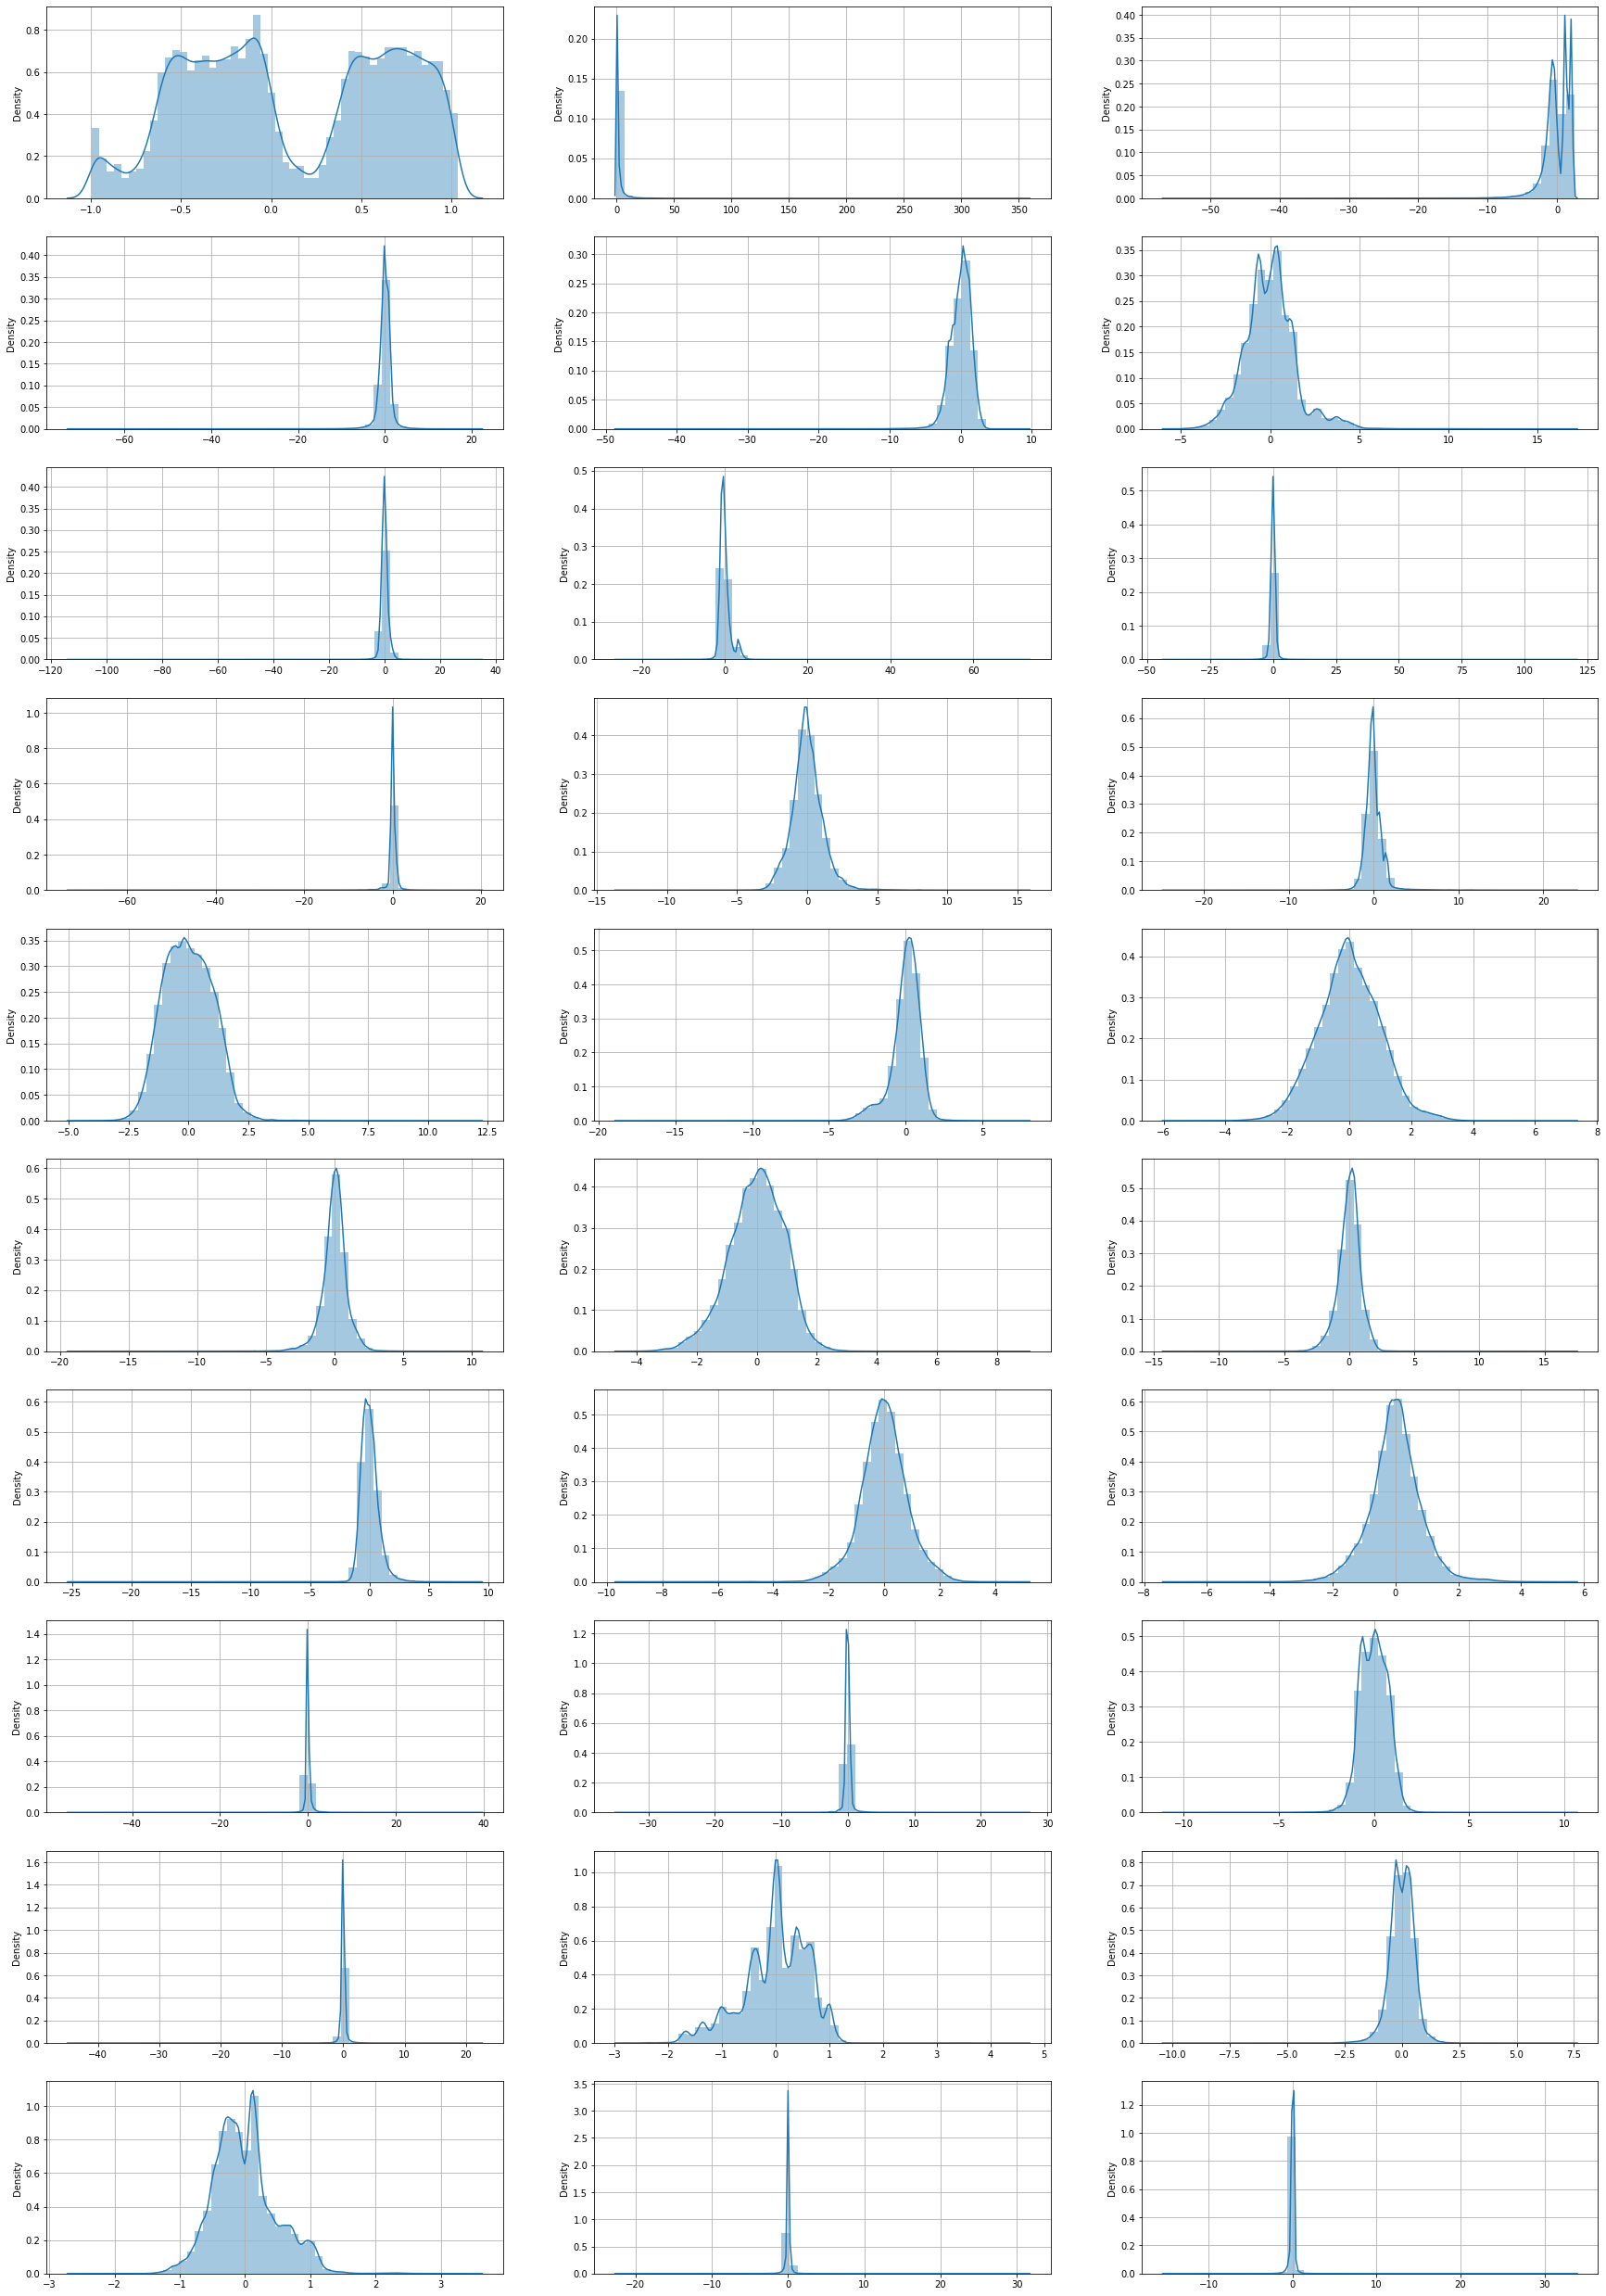

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
var = x.columns

plt.figure(figsize=(30,45))
i=0
for col in var:
    i += 1
    plt.subplot(10,3, i)
    sns.distplot(x=x[col])
    plt.grid()
  
plt.savefig("skew.png")
plt.show()


#Undersampling

In [ ]:
nm = NearMiss()
x_res_under,y_res_under=nm.fit_sample(x,y)
# Implementing Undersampling for Handling Imbalanced 
x_train,x_test,y_train,y_test=train_test_split(x_res_under,y_res_under,test_size=0.2,random_state=0)

In [ ]:
pt=PowerTransformer()
x_train=pt.fit_transform(x_train)
x_test=pt.transform(x_test)

In [ ]:
x_train_res_under = np.array(x_train)
x_test=np.array(x_test)
y_train_res_under=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
training=pd.DataFrame(x_train).reset_index(drop=True)

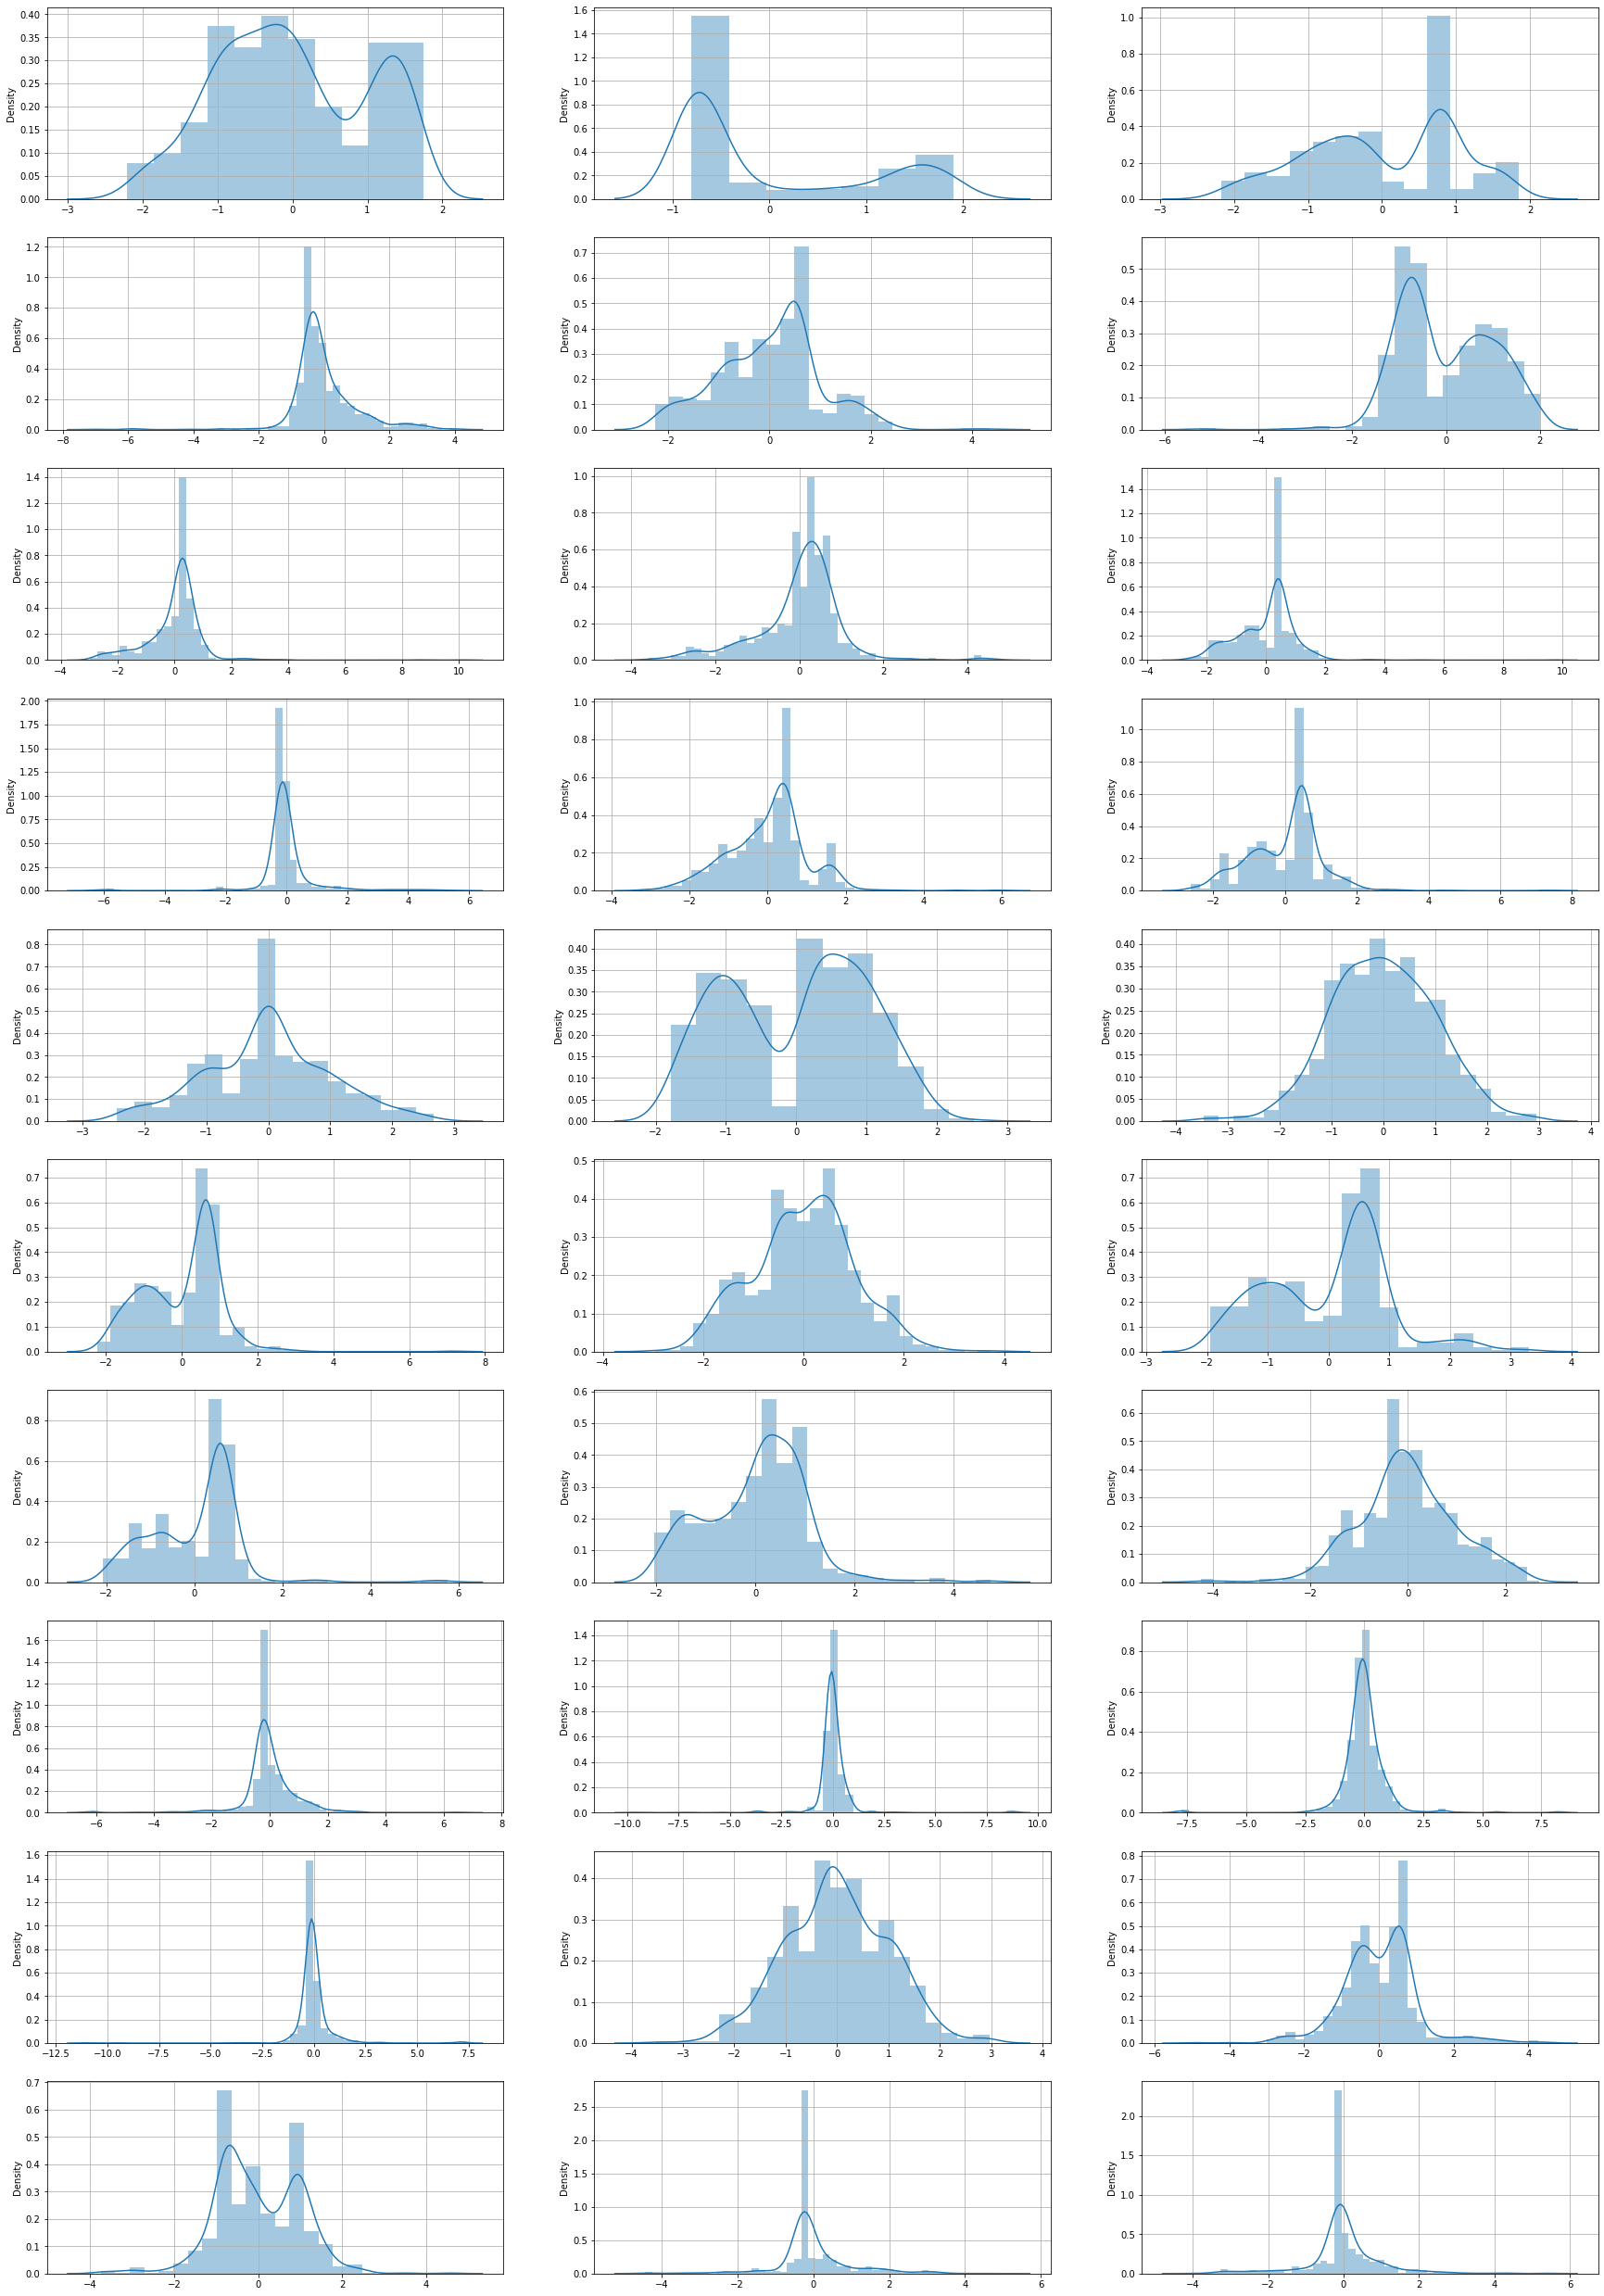

In [ ]:

# plot the histogram of a variable from the dataset to see the skewness
var = training.columns

plt.figure(figsize=(30,45))
i=0
for col in var:
    i += 1
    plt.subplot(10,3, i)
    sns.distplot(x=training[col])
    plt.grid()

plt.show()

In [ ]:


# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    roc_auc = metrics.auc(fpr,tpr)
    print("roc auc {}:".format(roc_auc))
    
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None



##Decision Tree

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(x_train_res_under,y_train_res_under)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         

In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008917,0.002230,0.003514,0.001707,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.969792,0.968174,0.948052,0.971753,0.979627,0.967479,0.010479,2
1,0.008998,0.002487,0.002661,0.000147,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.969631,0.968174,0.948052,0.971591,0.979627,0.967415,0.010459,3
2,0.006136,0.000138,0.003896,0.002443,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.955929,0.973144,0.914529,0.969968,0.980357,0.958786,0.023509,7
3,0.007168,0.002023,0.002671,0.000451,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.955929,0.973144,0.918182,0.969968,0.980357,0.959516,0.022139,6
4,0.011839,0.006123,0.003277,0.001255,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.975962,0.968174,0.948052,0.971591,0.979627,0.968681,0.011019,1


In [ ]:


# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)



Best roc auc score :  0.9686809640976307


In [ ]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
# Model with optimal hyperparameters
dt_imb_model = grid_search.best_estimator_

dt_imb_model.fit(x_train_res_under, y_train_res_under)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_train_pred = dt_imb_model.predict(x_train_res_under)
print(f1_score(y_train_res_under,y_train_pred))
print(f"Classification Report: \n {classification_report(y_train_res_under, y_train_pred)}")

0.9298701298701298
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       401
           1       0.93      0.93      0.93       386

    accuracy                           0.93       787
   macro avg       0.93      0.93      0.93       787
weighted avg       0.93      0.93      0.93       787



In [ ]:
y_test_pred = dt_imb_model.predict(x_test)
print(f1_score(y_test,y_test_pred))
print(f"Classification Report: \n {classification_report(y_test, y_test_pred)}")

0.892018779342723
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.87      0.87        91
           1       0.89      0.90      0.89       106

    accuracy                           0.88       197
   macro avg       0.88      0.88      0.88       197
weighted avg       0.88      0.88      0.88       197



roc auc 0.9462471490773379:


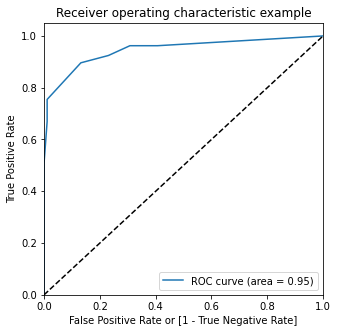

In [ ]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(x_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

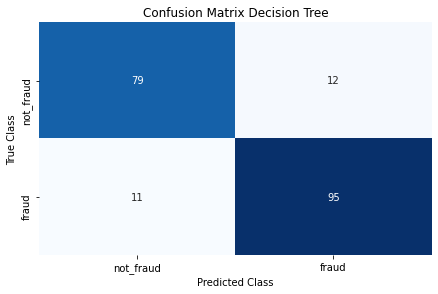

In [ ]:
matrix_dt = metrics.confusion_matrix(y_test, y_test_pred)
cm_dt = pd.DataFrame(matrix_dt, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_dt, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Decision Tree"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
print("Precision Decision Tree: {}".format(metrics.precision_score(y_test,y_test_pred)))
print("Recall Decision Tree: {}".format(metrics.recall_score(y_test,y_test_pred)))

Precision Decision Tree: 0.8878504672897196
Recall Decision Tree: 0.8962264150943396


#Logistic Regression

In [ ]:
param_grid = {
     'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['saga','liblinear']}
logreg = LogisticRegression()

grid_search = GridSearchCV(estimator = logreg, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

In [ ]:
grid_search.fit(x_train_res_under,y_train_res_under)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    6.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.636...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002411,0.000279,0.002331,0.000208,0.0001,l1,saga,"{'C': 0.0001, 'penalty': 'l1', 'solver': 'saga'}",0.500000,0.50000,0.500000,0.500000,0.500000,0.500000,0.000000,73
1,0.002877,0.001123,0.003311,0.001787,0.0001,l1,liblinear,"{'C': 0.0001, 'penalty': 'l1', 'solver': 'libl...",0.500000,0.50000,0.500000,0.500000,0.500000,0.500000,0.000000,73
2,0.006957,0.000454,0.002750,0.000693,0.0001,l2,saga,"{'C': 0.0001, 'penalty': 'l2', 'solver': 'saga'}",0.877404,0.90396,0.860552,0.901948,0.853084,0.879390,0.020801,71
3,0.002297,0.000098,0.002933,0.001061,0.0001,l2,liblinear,"{'C': 0.0001, 'penalty': 'l2', 'solver': 'libl...",0.877244,0.90364,0.860552,0.901948,0.853084,0.879294,0.020728,72
4,0.003316,0.001999,0.002256,0.000222,0.000263665,l1,saga,"{'C': 0.00026366508987303583, 'penalty': 'l1',...",0.500000,0.50000,0.500000,0.500000,0.500000,0.500000,0.000000,73


In [ ]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)

Best roc auc score :  0.9730716505716506


In [ ]:
print(grid_search.best_estimator_)

LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
# Model with optimal hyperparameters
lgr_imb_model = grid_search.best_estimator_

lgr_imb_model.fit(x_train_res_under, y_train_res_under)


LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_train_pred = lgr_imb_model.predict(x_train_res_under)
print(f1_score(y_train_res_under,y_train_pred))
print(f"Classification Report: \n {classification_report(y_train_res_under, y_train_pred)}")

0.9506008010680909
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       401
           1       0.98      0.92      0.95       386

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787



In [ ]:
y_test_pred = lgr_imb_model.predict(x_test)
print(f1_score(y_test,y_test_pred))
print(f"Classification Report: \n {classification_report(y_test, y_test_pred)}")

0.9306930693069307
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93        91
           1       0.98      0.89      0.93       106

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



roc auc 0.9589467136636949:


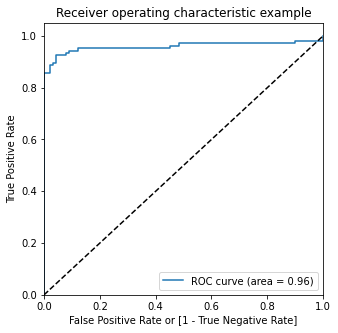

In [ ]:
# Predicted probability
y_test_pred_proba = lgr_imb_model.predict_proba(x_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

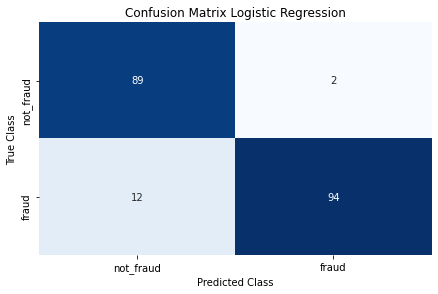

In [ ]:
matrix_lg = metrics.confusion_matrix(y_test, y_test_pred)
cm_lg = pd.DataFrame(matrix_lg, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_lg, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Logistic Regression"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
print("Precision Logistic Regression: {}".format(metrics.precision_score(y_test,y_test_pred)))
print("Recall Logistics Regression: {}".format(metrics.recall_score(y_test,y_test_pred)))

Precision Logistic Regression: 0.9791666666666666
Recall Logistics Regression: 0.8867924528301887


#SVM

In [ ]:
svm_reg=svm.SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','rbf'],
              'probability':[True]}
grid_search = GridSearchCV(estimator = svm_reg, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)


In [ ]:
grid_search.fit(x_train_res_under,y_train_res_under)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf'], 'probability': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,param_probability,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.052265,0.005088,0.003359,0.000499,0.1,1,linear,True,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear', 'pr...",0.966667,0.978836,0.931331,0.954708,0.962013,0.958711,0.015779,40
1,0.198374,0.007746,0.010279,0.000157,0.1,1,rbf,True,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf', 'proba...",0.978365,0.987013,0.995779,0.992045,1.000000,0.990641,0.007481,2
2,0.046079,0.002462,0.002850,0.000094,0.1,0.1,linear,True,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear', '...",0.966667,0.978836,0.931331,0.954708,0.962013,0.958711,0.015779,40
3,0.119712,0.006897,0.006274,0.000170,0.1,0.1,rbf,True,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf', 'pro...",0.979327,0.991182,0.993506,0.992857,0.998052,0.990985,0.006257,1
4,0.049386,0.003545,0.002822,0.000138,0.1,0.01,linear,True,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear', ...",0.966667,0.978836,0.931331,0.954708,0.962013,0.958711,0.015779,40


In [ ]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)

Best roc auc score :  0.9909848330681663


In [ ]:
print(grid_search.best_estimator_)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [ ]:
# Model with optimal hyperparameters
svm_imb_model = grid_search.best_estimator_

svm_imb_model.fit(x_train_res_under, y_train_res_under)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_train_pred = svm_imb_model.predict(x_train_res_under)
print(f1_score(y_train_res_under,y_train_pred))
print(f"Classification Report: \n {classification_report(y_train_res_under, y_train_pred)}")

0.9683377308707124
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       401
           1       0.99      0.95      0.97       386

    accuracy                           0.97       787
   macro avg       0.97      0.97      0.97       787
weighted avg       0.97      0.97      0.97       787



In [ ]:
y_test_pred_svm = svm_imb_model.predict(x_test)
print(f1_score(y_test,y_test_pred_svm))
print(f"Classification Report: \n {classification_report(y_test, y_test_pred_svm)}")

0.9807692307692307
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        91
           1       1.00      0.96      0.98       106

    accuracy                           0.98       197
   macro avg       0.98      0.98      0.98       197
weighted avg       0.98      0.98      0.98       197



roc auc 0.9833091436865022:


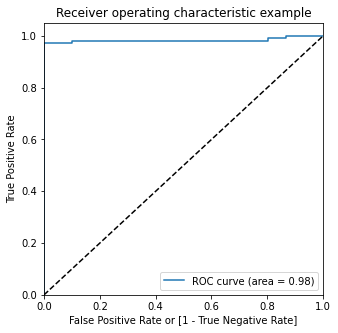

In [ ]:
# Predicted probability
y_test_pred_proba = svm_imb_model.predict_proba(x_test)[:,1]

# Plot the ROC curve
draw_roc(y_test,y_test_pred_proba)


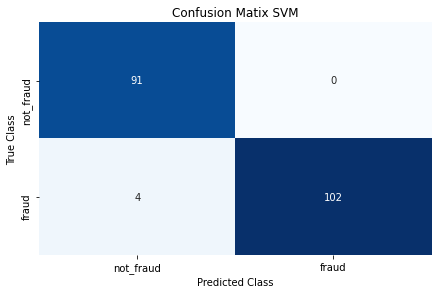

In [ ]:
matrix_svm= metrics.confusion_matrix(y_test, y_test_pred_svm)
cm_svm = pd.DataFrame(matrix_svm, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_svm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matix SVM"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
print("Precision SVM: {}".format(metrics.precision_score(y_test,y_test_pred_svm)))
print("Recall SVM : {}".format(metrics.recall_score(y_test,y_test_pred_svm)))


Precision SVM: 1.0
Recall SVM : 0.9622641509433962


#Linear Regression

In [ ]:
lr = LinearRegression()
lr.get_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

In [ ]:
lr.fit(x_train_res_under,y_train_res_under)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
prd_linear=lr.predict(x_test)

In [ ]:
#squishing the predicted values between 0 and 1 using sigmoid 1/(1+e^(-x))
prd_final=[]
for p in prd_linear:
  p = 1/(1+np.exp(-p))
  prd_final.append(p)


In [ ]:
pr_bin=[]
for p in prd_final:
  if p<=0.5:
    pr_bin.append(0)
  elif p>0.5:
    pr_bin.append(1)


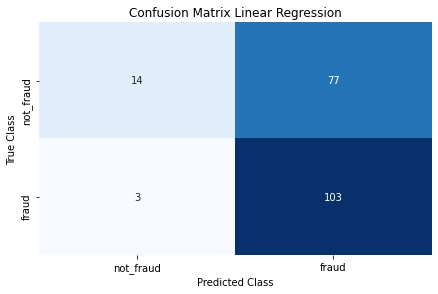

In [ ]:
matrix_linear = metrics.confusion_matrix(y_test, pr_bin)
cm_linear = pd.DataFrame(matrix_linear, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_linear, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Linear Regression"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
print("Precision using Linear Regression {}".format(metrics.precision_score(y_test,pr_bin)))
print("Recall using Linear Regression {}".format(metrics.recall_score(y_test,pr_bin)))

Precision using Linear Regression 0.5722222222222222
Recall using Linear Regression 0.9716981132075472


#Neural Ntework

In [ ]:
model = Sequential([
     #First Layer
     Dense(units=64, input_dim=30, activation='relu'),
      #Second Layer
     Dense(units=64,activation='relu'),
     #Dropout(0.5),
      #Third Layer
     Dense(32,activation='relu'),
     #Fourth Layer
     Dense(16,activation='relu'),
     Dropout(0.2),
     #Fifth Layer
     Dense(1,activation='sigmoid')  
    
    
])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 64)                1984      
_________________________________________________________________
dense_56 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_57 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_58 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 17        
Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
___________________________________________________

In [ ]:


model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train_res_under,y_train_res_under, batch_size=15, epochs=50,validation_split=0.2)



Epoch 1/50
42/42 [==============================] - 1s 8ms/step - loss: 0.5950 - accuracy: 0.8126 - val_loss: 0.2374 - val_accuracy: 0.9430
Epoch 2/50
42/42 [==============================] - 0s 4ms/step - loss: 0.2694 - accuracy: 0.9056 - val_loss: 0.1357 - val_accuracy: 0.9684
Epoch 3/50
42/42 [==============================] - 0s 3ms/step - loss: 0.1920 - accuracy: 0.9517 - val_loss: 0.1174 - val_accuracy: 0.9684
Epoch 4/50
42/42 [==============================] - 0s 3ms/step - loss: 0.1883 - accuracy: 0.9362 - val_loss: 0.1102 - val_accuracy: 0.9684
Epoch 5/50
42/42 [==============================] - 0s 3ms/step - loss: 0.1270 - accuracy: 0.9629 - val_loss: 0.1121 - val_accuracy: 0.9684
Epoch 6/50
42/42 [==============================] - 0s 3ms/step - loss: 0.1324 - accuracy: 0.9604 - val_loss: 0.1083 - val_accuracy: 0.9684
Epoch 7/50
42/42 [==============================] - 0s 3ms/step - loss: 0.0900 - accuracy: 0.9765 - val_loss: 0.1085 - val_accuracy: 0.9620
Epoch 8/50
42/42 [==

In [ ]:
score=model.evaluate(x_test,y_test)
print(score)


7/7 [==============================] - 0s 2ms/step - loss: 0.2379 - accuracy: 0.9746
[0.2378973364830017, 0.9746192693710327]


In [ ]:
y_pred_nn = model.predict_classes(x_test)

In [ ]:
#AUC
y_pred_nn_proba = model.predict_proba(x_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_pred_nn_proba)
auc_keras = metrics.auc(fpr_keras, tpr_keras)
print('AUC Neural Net: ', auc_keras)

AUC Neural Net:  0.9789550072568941


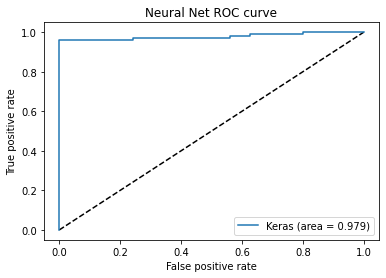

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Neural Net ROC curve')
plt.legend(loc='best')
plt.show()

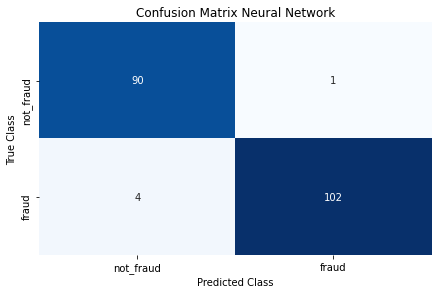

In [ ]:
matrix_nn = metrics.confusion_matrix(y_test, y_pred_nn)
cm_nn = pd.DataFrame(matrix_nn, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_nn, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Neural Network"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
print("Precision Neural Network(Keras): {}".format(metrics.precision_score(y_test,y_test_pred)))
print("Recall Neural Network(Keras): {}".format(metrics.recall_score(y_test,y_test_pred)))

Precision Neural Network(Keras): 0.8878504672897196
Recall Neural Network(Keras): 0.8962264150943396


#Neural Network Sklearn

In [ ]:
model5 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(128,128),random_state=0)
mlp = model5.fit(x_train_res_under, y_train_res_under)

In [ ]:
y_pred_mlp = model5.predict(x_test)

In [ ]:
y_pred_mlp_proba = model5.predict_proba(x_test)[::,1]
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(y_test,  y_pred_mlp_proba)
auc_mlp = metrics.roc_auc_score(y_test, y_pred_mlp_proba)
print("AUC MLP :", auc_mlp)

AUC MLP : 0.9740825212523326


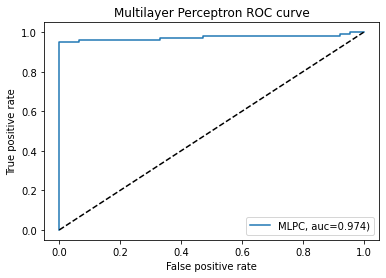

In [ ]:
plt.plot(fpr_mlp,tpr_mlp,label="MLPC, auc={:.3f})".format(auc_mlp))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Multilayer Perceptron ROC curve')
plt.legend(loc=4)
plt.show()

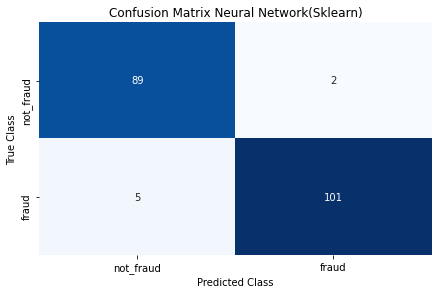

In [ ]:
matrix_nn = metrics.confusion_matrix(y_test, y_pred_mlp)
cm_nn = pd.DataFrame(matrix_nn, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_nn, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Neural Network(Sklearn)"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
print("Precision Neural Network(Sklearn): {}".format(metrics.precision_score(y_test,y_test_pred)))
print("Recall Neural Network (Sklearn): {}".format(metrics.recall_score(y_test,y_test_pred)))

Precision Neural Network(Sklearn): 0.8878504672897196
Recall Neural Network (Sklearn): 0.8962264150943396


#Unsupervised Learning

#K Means Clustering

In [ ]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x_train_res_under)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

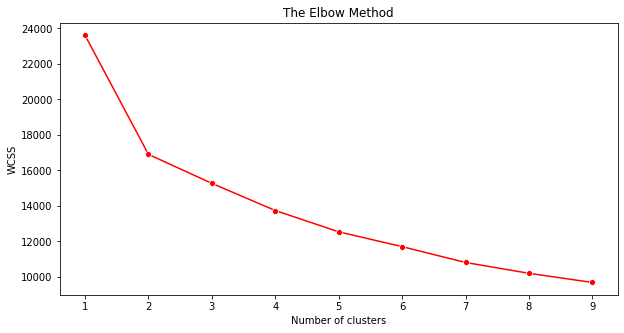

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 10), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=2,random_state=0,max_iter=10000,n_jobs=-1)

kmeans.fit(x_train_res_under)
kmeans_predicted_test_labels=kmeans.fit_predict(x_test)


In [ ]:

silhouette_avg = silhouette_score(x_test, kmeans_predicted_test_labels)
silhouette_avg

0.2978807288229476

#Gaussian Mixture Model

In [ ]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [ ]:
n_clusters=np.arange(2, 8)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(x_train_res_under) 
        labels=gmm.predict(x_train_res_under)
        sil=metrics.silhouette_score(x_train_res_under, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

Text(0, 0.5, 'Score')

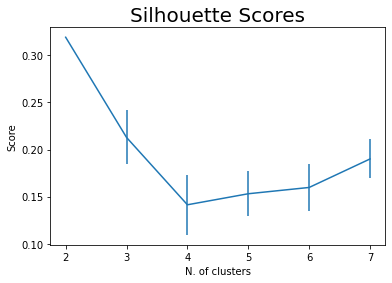

In [ ]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

In [ ]:
n_clusters=np.arange(2, 8)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(x_train_res_under) 
        
        tmp_bic.append(gmm.bic(x_train_res_under))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

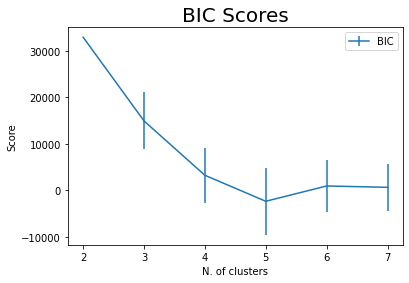

In [ ]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

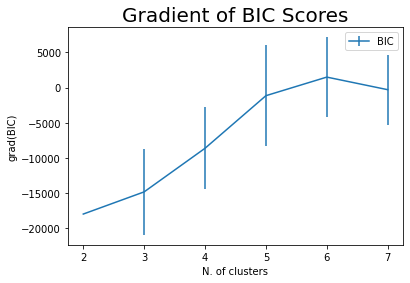

In [ ]:
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()

In [ ]:
gmm = GaussianMixture(n_components=3, random_state=42)

In [ ]:
gmm.fit(x_train_res_under)
gmp=gmm.predict(x_test)
silhouette_sc = silhouette_score(x_test, gmp)
silhouette_sc

0.1560201260400184

#Oversampling

In [ ]:
import imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
x_train_res,y_train_res=SMOTE().fit_sample(x,y.values.ravel())

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train_res, y_train_res, test_size = 0.3, random_state=0)

In [ ]:
pt=PowerTransformer()
x_train=pt.fit_transform(x_train)
x_test=pt.transform(x_test)

In [ ]:
x_train_res = np.array(x_train)
x_test=np.array(x_test)
y_train_res=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
#from collections import Counter
#print('Original dataset shape {}'.format(Counter(y)))
#print('Resampled dataset shape {}'.format(Counter(y_train_res)))

In [ ]:
x_train_res=pd.DataFrame(x_train_res).reset_index(drop=True)
y_train_res=pd.DataFrame(y_train_res).reset_index(drop=True)

In [ ]:

training=pd.DataFrame(x_train).reset_index(drop=True)


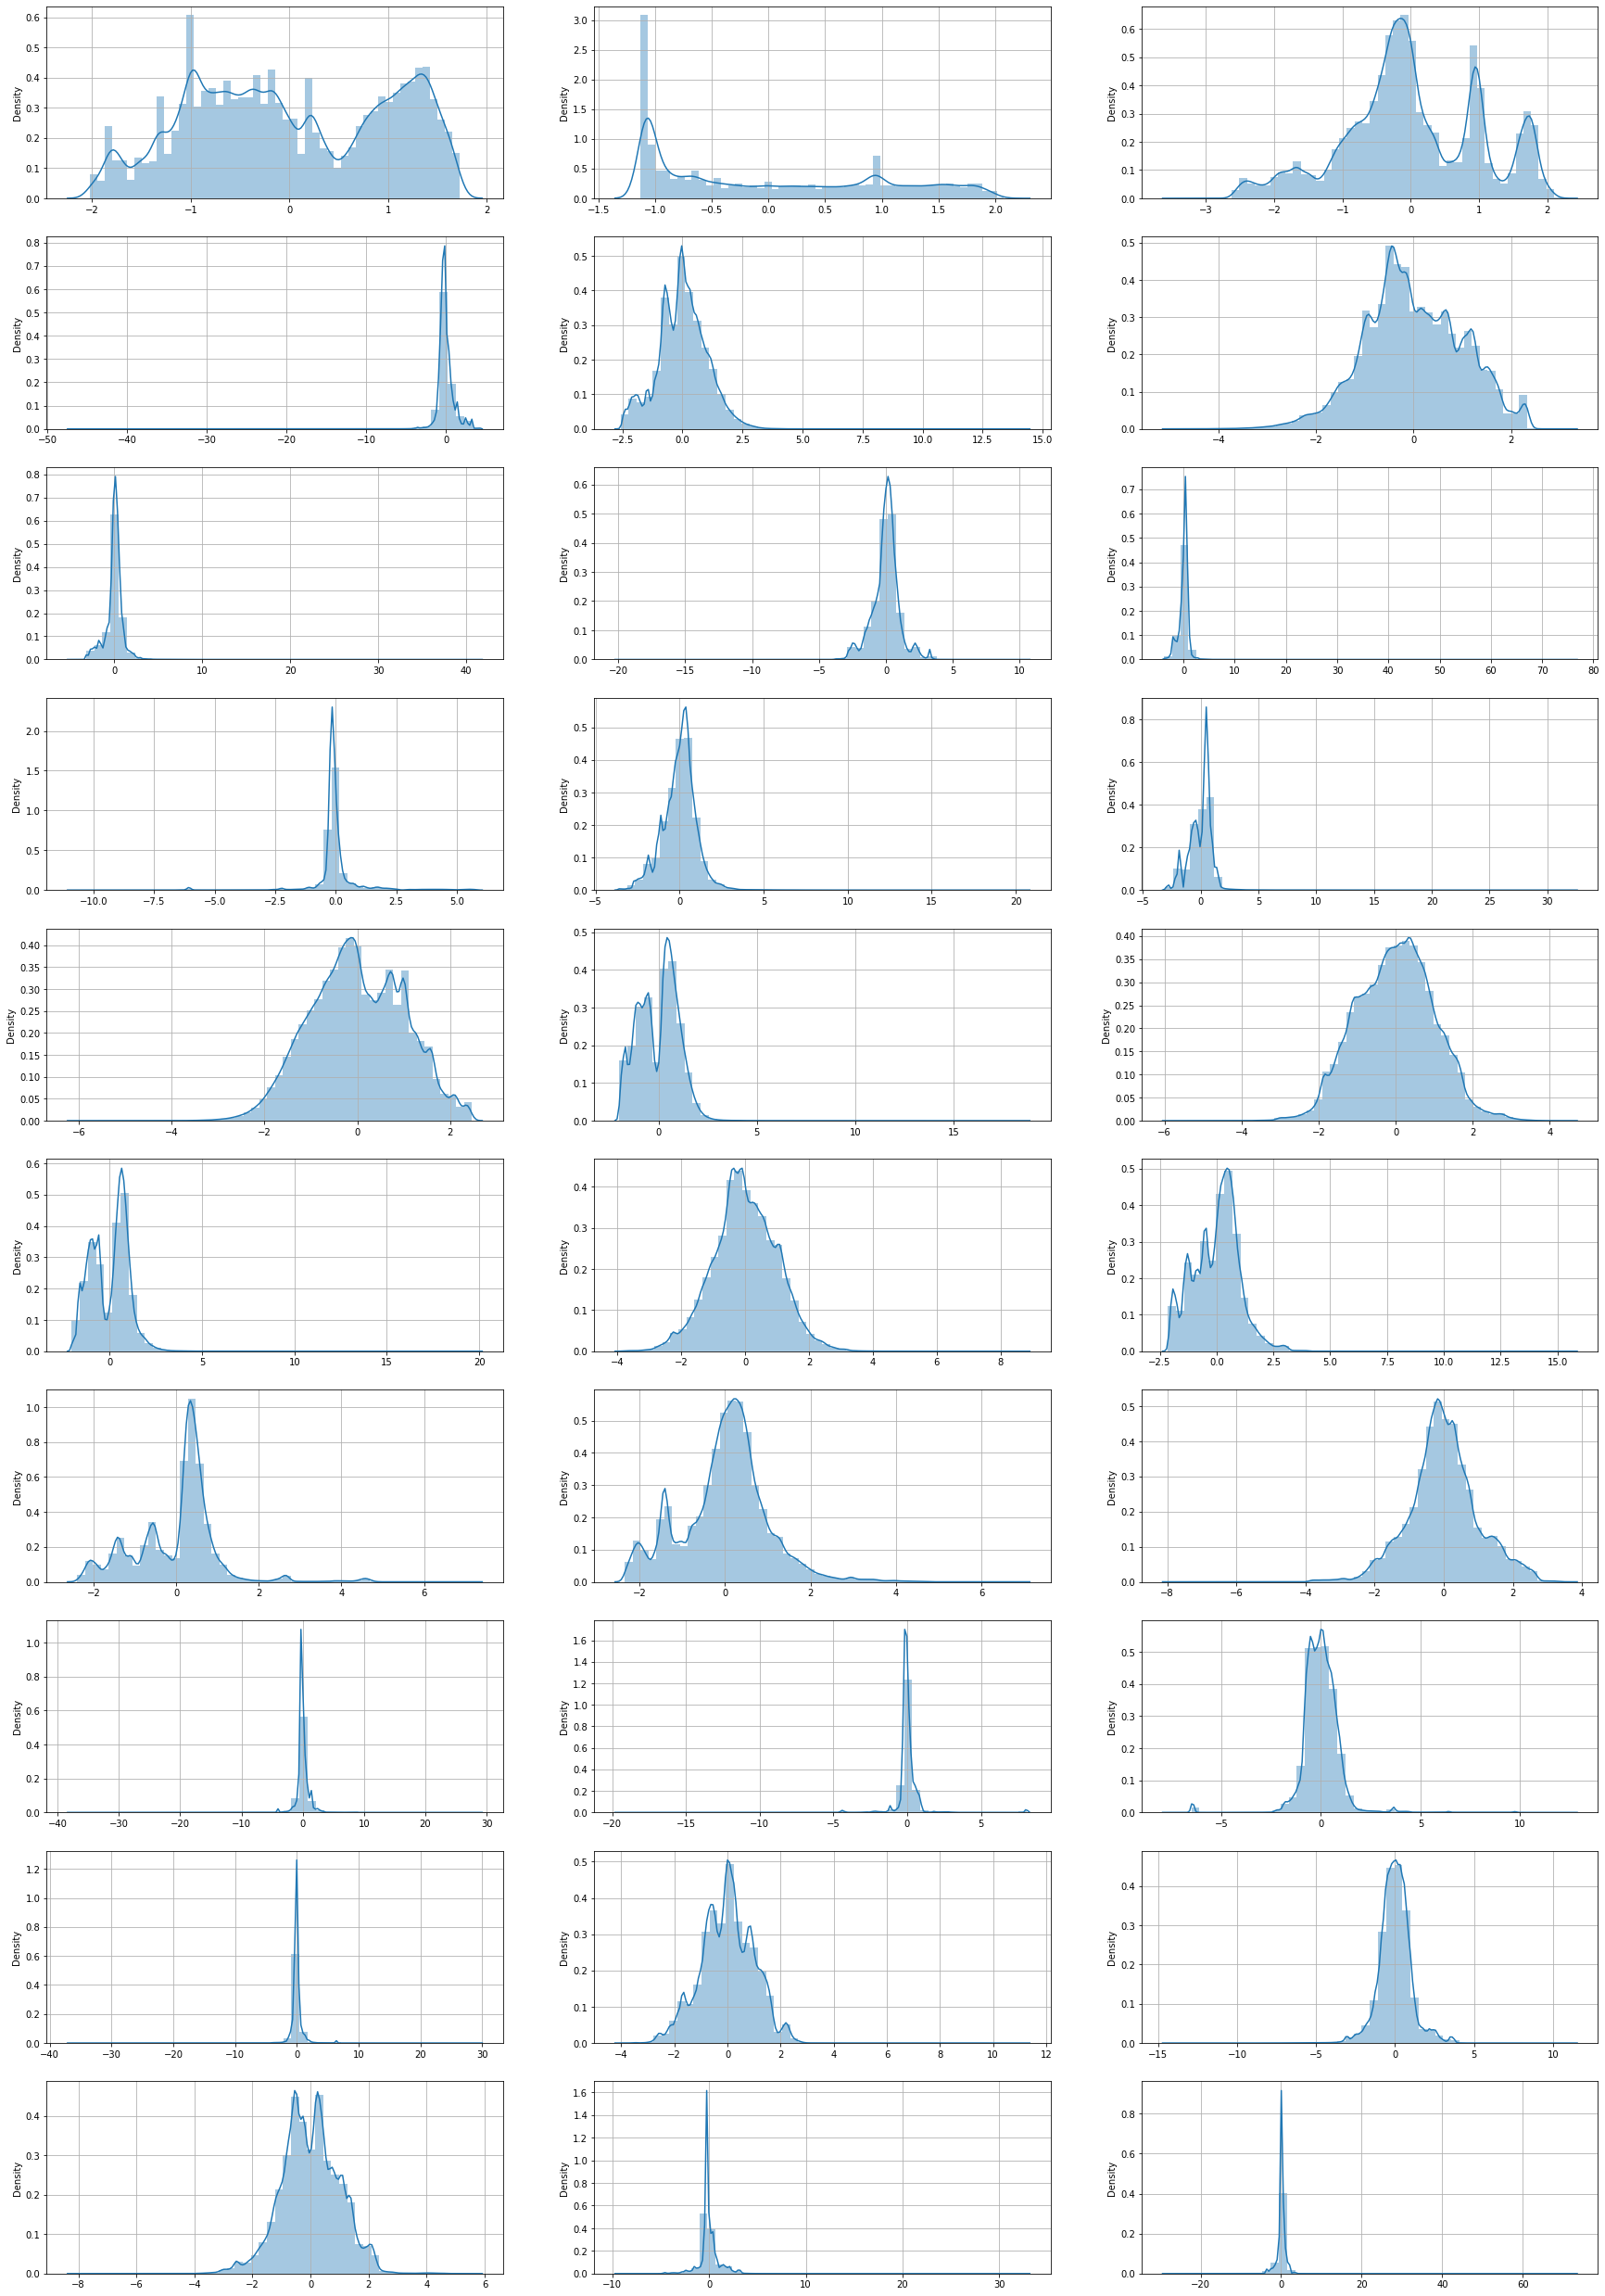

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
var = training.columns

plt.figure(figsize=(30,45))
i=0
for col in var:
    i += 1
    plt.subplot(10,3, i)
    sns.distplot(x=training[col])
    plt.grid()

plt.show()

#Decision Tree

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(x_train_res,y_train_res)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  6.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         

In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,12.723285,0.224747,0.054811,0.002751,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.984827,0.984741,0.984967,0.984452,0.985383,0.984874,0.000305,6
1,12.544812,0.055109,0.054945,0.002227,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.984837,0.984741,0.984960,0.984452,0.985380,0.984874,0.000304,5
2,12.466999,0.097947,0.056341,0.002654,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.984794,0.984872,0.984883,0.984439,0.985316,0.984861,0.000280,7
3,12.593106,0.135805,0.057189,0.004690,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.984794,0.984872,0.984883,0.984439,0.985316,0.984861,0.000280,8
4,23.968456,0.095632,0.062603,0.002696,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.997399,0.997381,0.997311,0.997256,0.997743,0.997418,0.000170,1


In [ ]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)

Best roc auc score :  0.9974179540430809


In [ ]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
# Model with optimal hyperparameters
dt_imb_model = grid_search.best_estimator_

dt_imb_model.fit(x_train_res, y_train_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_train_pred = dt_imb_model.predict(x_train_res)
print(f1_score(y_train_res,y_train_pred))
print(f"Classification Report: \n {classification_report(y_train_res, y_train_pred)}")

0.9870003020843823
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    199143
           1       0.99      0.99      0.99    198898

    accuracy                           0.99    398041
   macro avg       0.99      0.99      0.99    398041
weighted avg       0.99      0.99      0.99    398041



In [ ]:
y_pred_dt = dt_imb_model.predict(x_test)

print(f1_score(y_test,y_pred_dt))
print(f"Classification Report: \n {classification_report(y_test, y_pred_dt)}")


0.985672915714068
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     85172
           1       0.99      0.98      0.99     85417

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589



roc auc 0.9976887050872144:


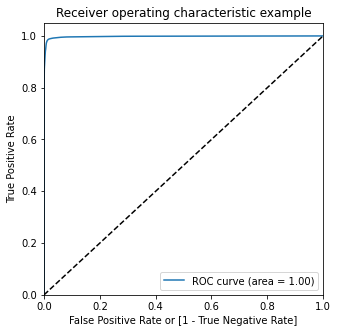

In [ ]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(x_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

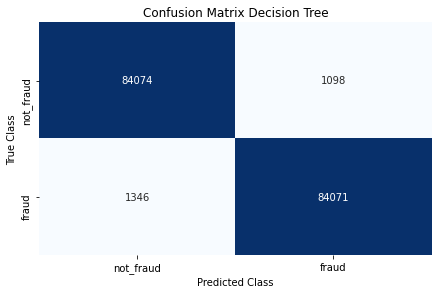

In [ ]:
matrix_dt = metrics.confusion_matrix(y_test, y_pred_dt)
cm_dt = pd.DataFrame(matrix_dt, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_dt, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Decision Tree"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
print("Precision Decision Tree: {}".format(metrics.precision_score(y_test,y_pred_dt)))
print("Recall Logistics Regression: {}".format(metrics.recall_score(y_test,y_pred_dt)))

Precision Decision Tree: 0.9871079852998157
Recall Logistics Regression: 0.9842420127140967


#Logistic Regression

In [ ]:
param_grid = {
     'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['saga','liblinear']}
logreg = LogisticRegression()

grid_search = GridSearchCV(estimator = logreg, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

In [ ]:
grid_search.fit(x_train_res,y_train_res)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 75.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.636...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.639883,0.350686,0.052117,0.001917,0.0001,l1,saga,"{'C': 0.0001, 'penalty': 'l1', 'solver': 'saga'}",0.983933,0.983588,0.983309,0.982707,0.984145,0.983536,0.000504,79
1,1.580153,0.127268,0.067809,0.004036,0.0001,l1,liblinear,"{'C': 0.0001, 'penalty': 'l1', 'solver': 'libl...",0.982826,0.982496,0.982293,0.981723,0.983210,0.982510,0.000501,80
2,4.119588,0.287586,0.064353,0.001951,0.0001,l2,saga,"{'C': 0.0001, 'penalty': 'l2', 'solver': 'saga'}",0.988140,0.988192,0.987528,0.987104,0.987977,0.987788,0.000414,73
3,2.554789,0.160318,0.068261,0.005328,0.0001,l2,liblinear,"{'C': 0.0001, 'penalty': 'l2', 'solver': 'libl...",0.987899,0.987968,0.987365,0.986918,0.987722,0.987574,0.000389,74
4,5.266638,0.413975,0.067196,0.005264,0.000263665,l1,saga,"{'C': 0.00026366508987303583, 'penalty': 'l1',...",0.985979,0.985669,0.985237,0.984775,0.986029,0.985538,0.000474,77


In [ ]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)

Best roc auc score :  0.9899775411351494


In [ ]:
print(grid_search.best_estimator_)

LogisticRegression(C=206.913808111479, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
# Model with optimal hyperparameters
lgr_imb_model = grid_search.best_estimator_

lgr_imb_model.fit(x_train_res, y_train_res)

LogisticRegression(C=206.913808111479, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_train_pred = lgr_imb_model.predict(x_train_res)
print(f1_score(y_train_res,y_train_pred))
print(f"Classification Report: \n {classification_report(y_train_res, y_train_pred)}")

0.9525291271204007
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95    199143
           1       0.97      0.94      0.95    198898

    accuracy                           0.95    398041
   macro avg       0.95      0.95      0.95    398041
weighted avg       0.95      0.95      0.95    398041



In [ ]:
y_pred_lg = lgr_imb_model.predict(x_test)
print(f1_score(y_test,y_pred_lg))
print(f"Classification Report: \n {classification_report(y_test, y_pred_lg)}")

0.9521734212108763
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     85172
           1       0.97      0.94      0.95     85417

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



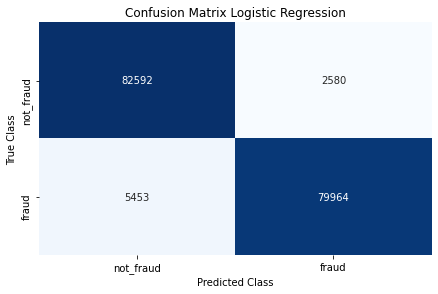

In [ ]:
matrix_lg = metrics.confusion_matrix(y_test, y_pred_lg)
cm_lg = pd.DataFrame(matrix_lg, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_lg, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Logistic Regression"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

roc auc 0.990186045746128:


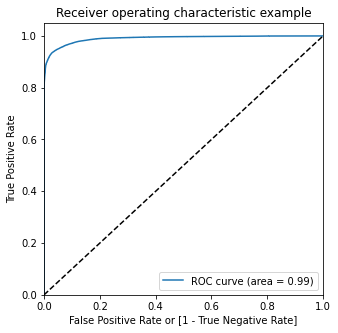

In [ ]:
# Predicted probability
y_test_pred_proba = lgr_imb_model.predict_proba(x_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [ ]:
print("Precision Logistic Regression: {}".format(metrics.precision_score(y_test,y_pred_lg)))
print("Recall Logistics Regression: {}".format(metrics.recall_score(y_test,y_pred_lg)))

Precision Logistic Regression: 0.9687439426245397
Recall Logistics Regression: 0.9361602491307351


#SVM

In [ ]:
svm_reg=svm.SVC(probability=True)


In [ ]:
# Model with optimal hyperparameters
svm_reg.fit(x_train_res,y_train_res)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Predicted probability
y_train_pred_proba = svm_reg.predict_proba(x_test)[:,1]

# Plot the ROC curve



In [ ]:
y_test_pred = svm_reg.predict(x_test)
print(f1_score(y_test,y_test_pred))
print(f"Classification Report: \n {classification_report(y_test, y_test_pred)}")

0.9975274869798517
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85172
           1       1.00      1.00      1.00     85417

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



roc auc 0.9998183425205414:


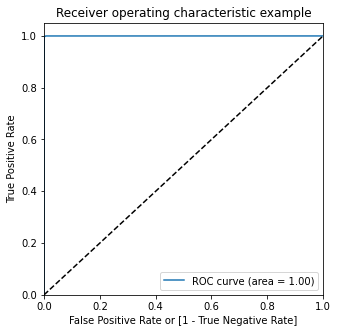

In [ ]:
# Predicted probability
y_test_pred_proba = svm_reg.predict_proba(x_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

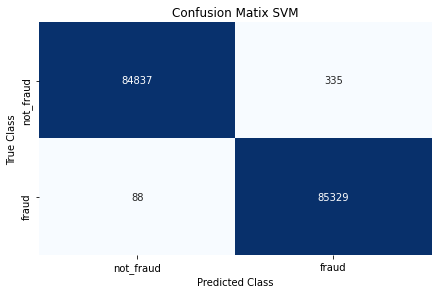

In [ ]:
 matrix_svm= metrics.confusion_matrix(y_test, y_test_pred)
cm_svm = pd.DataFrame(matrix_svm, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_svm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matix SVM"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
print("Precision SVM: {}".format(metrics.precision_score(y_test,y_test_pred)))
print("Recall SVM : {}".format(metrics.recall_score(y_test,y_test_pred)))

Precision SVM: 0.9960893724318267
Recall SVM : 0.9989697601180093


#Linear Regression

In [ ]:
lr=LinearRegression()
lr.fit(x_train_res,y_train_res)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pdl=lr.predict(x_test)

In [ ]:
prd_final_over=[]
for p in pdl:
  p = 1/(1+np.exp(-p))
  prd_final_over.append(p)

In [ ]:
final_over=[]
for p in prd_final_over:
  if p<=0.5:
    final_over.append(0)
  elif p>0.5:
    final_over.append(1)

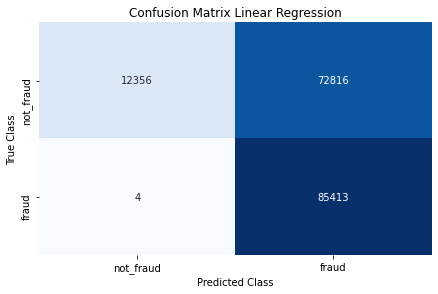

In [ ]:
matrix_linear_over = metrics.confusion_matrix(y_test, final_over)
cm_linear = pd.DataFrame(matrix_linear_over, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_linear, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Linear Regression"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
print("Precision using Linear Regression {}".format(metrics.precision_score(y_test,final_over)))
print("Recall using Linear Regression {}".format(metrics.recall_score(y_test,final_over)))

Precision using Linear Regression 0.5398062302106441
Recall using Linear Regression 0.999953170914455


#Neural Network

In [ ]:
model = Sequential([
     #First Layer
     Dense(units=264, input_dim=30, activation='relu'),
      #Second Layer
     Dense(units=264,activation='relu'),
     Dropout(0.5),
      #Third Layer
     Dense(128,activation='relu'),
     #Fourth Layer
     Dense(64,activation='relu'),
     #Fifth Layer
     Dense(1,activation='sigmoid')  
    
    
])


model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 264)               8184      
_________________________________________________________________
dense_61 (Dense)             (None, 264)               69960     
_________________________________________________________________
dropout_11 (Dropout)         (None, 264)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 128)               33920     
_________________________________________________________________
dense_63 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 65        
Total params: 120,385
Trainable params: 120,385
Non-trainable params: 0
_______________________________________________

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_train_res,y_train_res, batch_size=50, epochs=10,validation_split=0.1)

Epoch 1/10
7165/7165 [==============================] - 31s 4ms/step - loss: 0.0455 - accuracy: 0.9844 - val_loss: 0.0056 - val_accuracy: 0.9985
Epoch 2/10
7165/7165 [==============================] - 29s 4ms/step - loss: 0.0072 - accuracy: 0.9983 - val_loss: 0.0045 - val_accuracy: 0.9985
Epoch 3/10
7165/7165 [==============================] - 29s 4ms/step - loss: 0.0061 - accuracy: 0.9988 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 4/10
7165/7165 [==============================] - 30s 4ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.0052 - val_accuracy: 0.9987
Epoch 5/10
7165/7165 [==============================] - 29s 4ms/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0022 - val_accuracy: 0.9995
Epoch 6/10
7165/7165 [==============================] - 30s 4ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0023 - val_accuracy: 0.9995
Epoch 7/10
7165/7165 [==============================] - 30s 4ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0065 - val_ac

In [ ]:
score=model.evaluate(x_test,y_test)
print(score)

5331/5331 [==============================] - 10s 2ms/step - loss: 0.0023 - accuracy: 0.9995
[0.002326791174709797, 0.999472439289093]


In [ ]:

y_pred_nn = model.predict_classes(x_test)

In [ ]:


#AUC
y_pred_nn_proba = model.predict_proba(x_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_pred_nn_proba)
auc_keras = metrics.auc(fpr_keras, tpr_keras)
print('AUC Neural Net: ', auc_keras)

AUC Neural Net:  0.9999711111958479


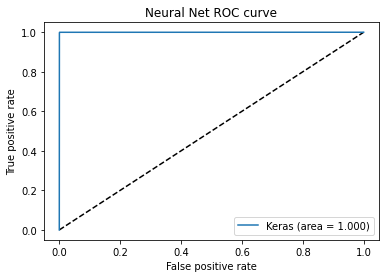

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Neural Net ROC curve')
plt.legend(loc='best')
plt.show()

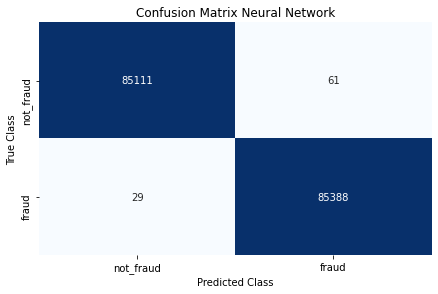

In [ ]:
matrix_nn = metrics.confusion_matrix(y_test, y_pred_nn)
cm_nn = pd.DataFrame(matrix_nn, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_nn, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Neural Network"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
print("Precision Neural Network(Keras): {}".format(metrics.precision_score(y_test,y_pred_nn)))
print("Recall Neural Network(Keras): {}".format(metrics.recall_score(y_test,y_pred_nn)))

Precision Neural Network(Keras): 0.9992861238867629
Recall Neural Network(Keras): 0.9996604891297985


#MLP Sklearn

In [ ]:
model5 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(64,64), random_state=2)
mlp = model5.fit(x_train_res, y_train_res)

In [ ]:
y_pred_mlp = model5.predict(x_test)

In [ ]:
y_pred_mlp_proba = model5.predict_proba(x_test)[::,1]
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(y_test,  y_pred_mlp_proba)
auc_mlp = metrics.roc_auc_score(y_test, y_pred_mlp_proba)
print("AUC MLP :", auc_mlp)

AUC MLP : 0.9975460402770019


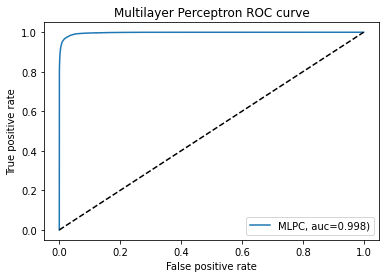

In [ ]:
plt.plot(fpr_mlp,tpr_mlp,label="MLPC, auc={:.3f})".format(auc_mlp))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Multilayer Perceptron ROC curve')
plt.legend(loc=4)
plt.show()

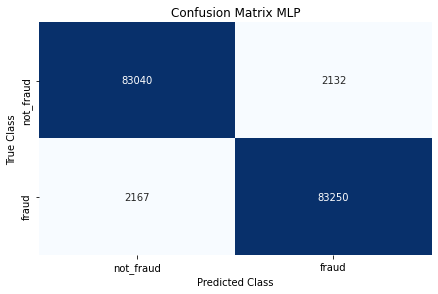

In [ ]:
matrix_mlp = metrics.confusion_matrix(y_test, y_pred_mlp)
cm_mlp = pd.DataFrame(matrix_mlp, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_mlp, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix MLP"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
print("Precision Logistic Regression(sklearn): {}".format(metrics.precision_score(y_test,y_pred_mlp)))
print("Recall Logistics Regression(sklearn): {}".format(metrics.recall_score(y_test,y_pred_mlp)))

Precision Logistic Regression(sklearn): 0.9750298657796725
Recall Logistics Regression(sklearn): 0.9746303429059789


In [ ]:
plt.subplot(1,3,1)
sns.heatmap(cm_dt, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Decision Tree"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()
plt.subplot(1,3,2)
sns.heatmap(cm_lg, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Logistic Regression"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()
plt.subplot(1,3,3)
sns.heatmap(cm_linear, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Linear Regression"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()
plt.subplot(2,3,1)



#Unsupervised Learning

# K Means Clustering

In [ ]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x_train_res)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

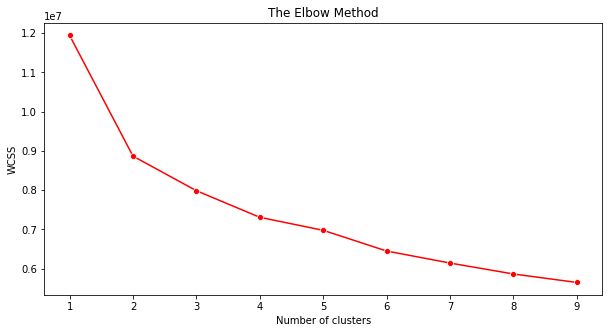

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 10), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=2,random_state=0,max_iter=10000,n_jobs=-1)

kmeans.fit(x_train_res)
kmeans_predicted_test_labels=kmeans.fit_predict(x_test)

In [ ]:

silhouette_avg = silhouette_score(x_test, kmeans_predicted_test_labels)
silhouette_avg

0.2774339777393798

In [ ]:
kmeans_predicted_test_labels

array([1, 0, 1, ..., 0, 0, 1], dtype=int32)

#Gaussian Mixture Models

In [ ]:
gmm = GaussianMixture(n_components=3, random_state=42)

In [ ]:
gmm.fit(x_train_res)
gmp=gmm.predict(x_test)
silhouette_sc = silhouette_score(x_test, gmp)
silhouette_sc

0.21097830491961161